<a href="https://colab.research.google.com/github/Khomiakov7706/SKAB/blob/master/USD_RUB_MOEX_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
pip install requests bs4

In [59]:
from urllib.request import urlopen
import requests # Модуль для обработки URL
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from google.colab import files

# Анализ исходного кода [страницы Finam](https://www.finam.ru/profile/mosbirzha-valyutnyj-rynok/usdrubtom-usd-rub/export/?market=45&em=182400&token=03AGdBq27DuogTQoyynyc27rTTQClZsi9-EBxeMbo3fau_5sdu0cjMGP0bRqO82XHU_t7wTiE4TbbasAVSjnKN7Y2DqtZDZuM4HigoH2TozLqR_gCzs8rh8o4AF20mto16Rv0Ld6UBAumszFZkbYBqc1ofD_onpudH9msQrXyqM72Dei5EMt7jUrLBsQlboMPK0a94oC5TFjPQh-qjfwb1JY7s_esOV6GGYQPO7_rcOMy8X9k8AU1uw6FSOvWYzFARaJ6JnN4RVlQiSpnWSCeSSoGin00riRXMFZAU67k09p4rJdnQBsrBglxo941peEj9sw5Wf9iOgX4GhEtccOddp3nmiQbTsbVMABbfB0_-hccRHSeIn8p7bx6tg2AW_mpWiSt4WjOdFhImAGMMKF05cdSUwHtrcsJIWgGu4Rj6Uwl8xwo8AWHHOAMyKU2JHN-LyWiCoRSg9mZgPDQw6CrwEnxDJDr8LR3FAg&code=USD000UTSTOM&apply=0&df=8&mf=3&yf=2022&from=08.04.2022&dt=10&mt=3&yt=2022&to=10.04.2022&p=6&f=USD000UTSTOM_220408_220410&e=.csv&cn=USD000UTSTOM&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1) с курсом $ USDRUB_TOM 




Finam.IssuerProfile.Main.issue = {
                                    "quote": {
                                        "id": 182400,
                                        "code": "USD000UTSTOM",
                                        "fullUrl": "mosbirzha-valyutnyj-rynok/usdrubtom-usd-rub",

                                        "title": "USDRUB_TOM",
                                        "decp": 4,
                                        "testDriveEnabled": false,
                                        "market": {
                                            "id": 45,
                                            "title": "МосБиржа валютный рынок",

                                            "volumeEnabled": true
                                        },
                                        "info": {
                                            "decp": 4,
                                            "last": 76.08,
                                            "pchange": 0.43564,
                                            "change": 0.33,
                                            "bid": null,
                                            "ask": null,
                                            "open": 75.75,
                                            "high": 76.26,
                                            "low": 71,
                                            "close": 75.75,
                                            "volume": 1344670000,
                                            "date": "08.04.2022 18:59:52",
                                            "weekMin": 71,
                                            "weekMax": 85.315,
                                            "monthMin": 71,
                                            "monthMax": 121.5275,
                                            "yearMin": 69.21,
                                            "yearMax": 121.5275,
                                            "currency": null,
                                            "volumeCode": null
                                        },

Для USDRUB_TOM:

market = 45, 

em = 182400, 

code = USDRUB_TOM

# Parameters:

market, em, code – об этих параметрах, упоминал ранее, при обращении к функции их значения будут приниматься из файла.

df, mf, yf, from, dt, mt, yt, to – это параметры времени.

p — период котировок (тики, 1 мин., 5 мин., 10 мин., 15 мин., 30 мин., 1 час, 1 день, 1 неделя, 1 месяц)

e – расширение получаемого файла; возможны варианты — .txt либо .csv
dtf — формат даты (1 — ггггммдд, 2 — ггммдд, 3 — ддммгг, 4 — дд/мм/гг, 5 — мм/дд/гг)

tmf — формат времени (1 — ччммсс, 2 — ччмм, 3 — чч: мм: сс, 4 — чч: мм)

MSOR — выдавать время (0 — начала свечи, 1 — окончания свечи)

mstimever — выдавать время (НЕ московское — mstimever=0; московское — mstime='on', mstimever='1')

sep — параметр разделитель полей (1 — запятая (,), 2 — точка (.), 3 — точка с запятой (;), 4 — табуляция (»), 5 — пробел ( ))

sep2 — параметр разделитель разрядов (1 — нет, 2 — точка (.), 3 — запятая (,), 4 — пробел ( ), 5 — кавычка ('))

datf — Перечень получаемых данных (#1 — TICKER, PER, DATE, TIME, OPEN, HIGH, LOW, CLOSE, VOL; #2 — TICKER, PER, DATE, TIME, OPEN, HIGH, LOW, CLOSE; #3 — TICKER, PER, DATE, TIME, CLOSE, VOL; #4 — TICKER, PER, DATE, TIME, CLOSE; #5 — DATE, TIME, OPEN, HIGH, LOW, CLOSE, VOL; #6 — DATE, TIME, LAST, VOL, ID, OPER).

at — добавлять заголовок в файл (0 — нет, 1 — да)

In [69]:
# Quotation period (ticks, 1 min., 5 min., 10 min., 15 min., 30 min., 1 hour, 1 day, 1 week, 1 month)
p='3';  

# Start date
yf='2022';
month_start='02';
day_start='02';

# End date
yt='2022';
month_end='02';
day_end='02';

# Instrument id 
code='USD000UTSTOM';

#format: .csv or .txt
e='.csv';
# Market code
market='45'
#Instrument identificator
em='182400';

dtf='4';
tmf='3';
MSOR='1';
mstime='on'
mstimever='1'
sep='1';
sep2='2';
datf='1';
at='1';
token = '03AGdBq24ovEJd8iyoRM0KqneYCBee_4L_fk3LvgobJXZRH0DU2N98U_Q-FCZ90ToKmFgwuSQ_CyIQWt4n4uy4T6LOEICjsb2x24qFOFhs6jO6NjeCgco1CBCeF43vHINO4Mk4DGY7DVMVfwT691aQYzm3Xx-S1eG0gPT0A5LFVbeFdsCaNDl73l0anIPQDojRZy5tQNj5UXZF5iRP7ySz3cK-mR5SsEX5ZFCbfgu1B1p7wDM2YkByjAVIYQX5B2lYUxGlJemOPm8mTybyYboTSnN6fV8gk2wPUMJ9JeWjf9mldjKWpy-cVEtE57_Pj4nrTNhq9cDhDwh79yZXL6rNl5gHobsbCPdDVPkKGcL-Xfr_4M0FlhkhDl9RGX4bpoPk9sdBXnNm2jhFMtlDf8s6RTj3BlifiMXUrqLOhtnoKoWsDr2jkHT_lHWYoWSrniN8ApINCYNPtvUbUDLVQEx2xczp-t0HGN6Jhg'


In [70]:
# Date transformations for https request – do not change
year_start=yf[2:];
year_end=yt[2:];
mf=(int(month_start.lstrip('0')))-1;
mt=(int(month_end.lstrip('0')))-1;
df=(int(day_start.lstrip('0')))-1;
dt=(int(day_end.lstrip('0')))-1;

# Finam https-request with the parameters listed above

In [71]:
# Web-url for downloading data
weblink = 'https://export.finam.ru/export9.out?market='+str(market)+'&em='+str(em)+'&token=&code='+str(code)+'&apply=0&df='+str(df)+'&mf='+str(mf)+'&yf='+str(yf)+'&from='+str(day_start)+'.'+str(month_start)+'.'+str(yf)+'&dt='+str(dt)+'&mt='+str(mt)+'&yt='+str(yt)+'&to='+str(day_end)+'.'+str(month_end)+'.'+str(yt)+'&p='+str(p)+'&f='+str(code)+'_'+str(year_start)+str(month_start)+str(day_start)+'_'+str(year_end)+str(month_end)+str(day_end)+'&e=.'+str(e)+'&cn='+str(code)+'&dtf='+str(dtf)+'&tmf='+str(tmf)+'&MSOR='+str(MSOR)+'&mstime='+str(mstime)+'&mstimever='+str(mstimever)+'&sep='+str(sep)+'&sep2='+str(sep2)+'&datf='+str(datf)+'&at='+str(at)

# Describing virtual environment to pretend being a real user 
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}

# performing request
page = requests.get(weblink, headers=headers)
page_url = page.url # saving page url

# Data transformation

Turn data from a string to a DataFrame

In [72]:
TESTDATA = StringIO(page.text) # String to text

data = pd.read_csv(TESTDATA, sep=",") # Text to DataFrame

Replacing extra simbols

In [73]:
data.columns = data.columns.str.replace('<','')
data.columns = data.columns.str.replace('>','')

# Saving data into a file

In [74]:
data.to_csv(str(code)+str(e))

In [66]:
files.download(str(code)+str(e))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualising data

In [75]:
data.head()

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,USD000UTSTOM,5,01/02/22,07:05:00,77.3200,77.380,77.270,77.2825,3.223.000
1,USD000UTSTOM,5,01/02/22,07:10:00,77.2750,77.275,77.205,77.2125,8.854.000
2,USD000UTSTOM,5,01/02/22,07:15:00,77.2125,77.250,77.160,77.1600,6.596.000
3,USD000UTSTOM,5,01/02/22,07:20:00,77.1825,77.200,77.065,77.0825,14.951.000
4,USD000UTSTOM,5,01/02/22,07:25:00,77.0900,77.100,77.045,77.0500,6.377.000


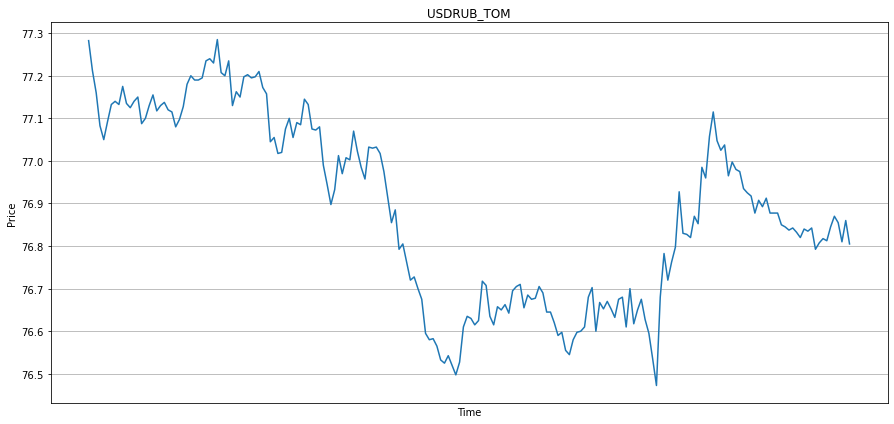

In [76]:
plt.figure(figsize=(15,7))

plt.plot(data['TIME'],data['CLOSE'])

plt.title('USDRUB_TOM')

plt.xticks([])

plt.xlabel('Time')
plt.ylabel('Price')

plt.grid()

plt.show()